# Data Science Assignment 4 : Simple Linear Regression

### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
#### 1. Predict delivery time using sorting time 


Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [2]:
data = pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### EDA and Data Visualization

Information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Statistical parameters

In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


No. of rows and columns

In [5]:
data.shape

(21, 2)

Checking if data contains any null values

In [6]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

There are no null values. If there were any null values, we could have used: data.dropna()

Boxplot

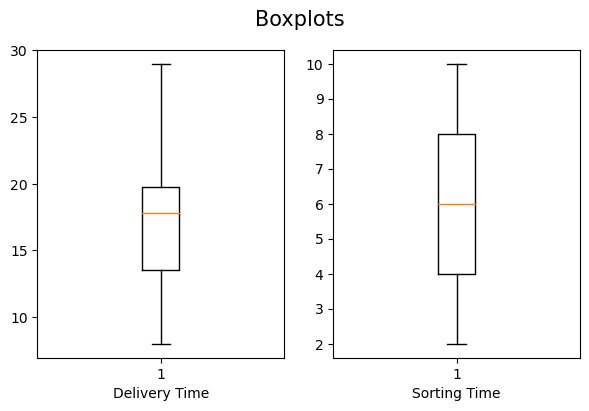

In [7]:
plt.figure(figsize = (7,4))
plt.subplot(1,2,1)
plt.suptitle('Boxplots', fontsize = 15)
plt.boxplot(data['Delivery Time'])
plt.xlabel('Delivery Time')
plt.subplot(1,2,2)
plt.boxplot(data['Sorting Time'])
plt.xlabel('Sorting Time')
plt.show()

Distribution plot

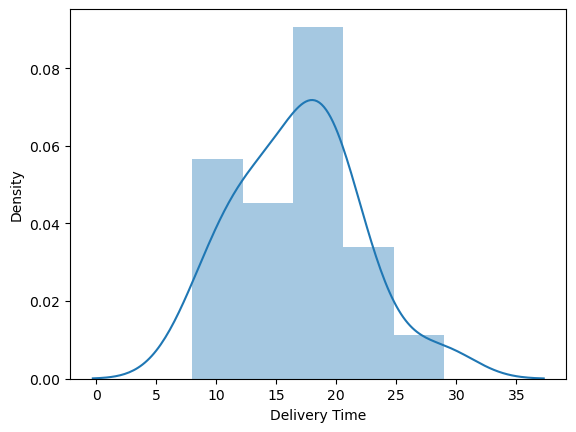

In [8]:
sns.distplot(data["Delivery Time"])
plt.show()

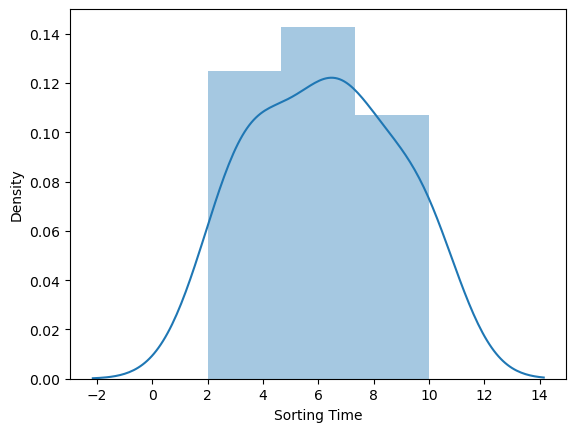

In [9]:
sns.distplot(data["Sorting Time"])
plt.show()

Pair Plot

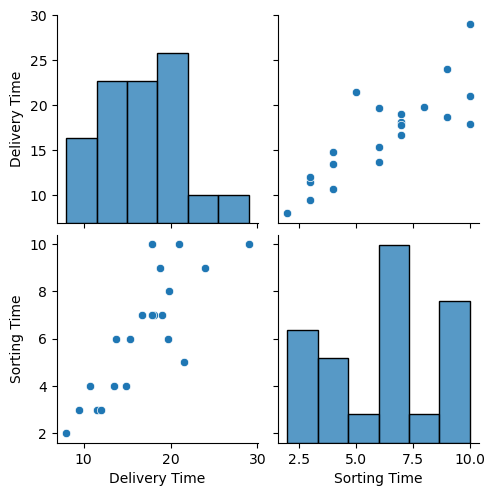

In [10]:
sns.pairplot(data)
plt.show()

Renaming columns

In [11]:
data = data.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Finding correlation between columns

In [12]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


Regression Plot

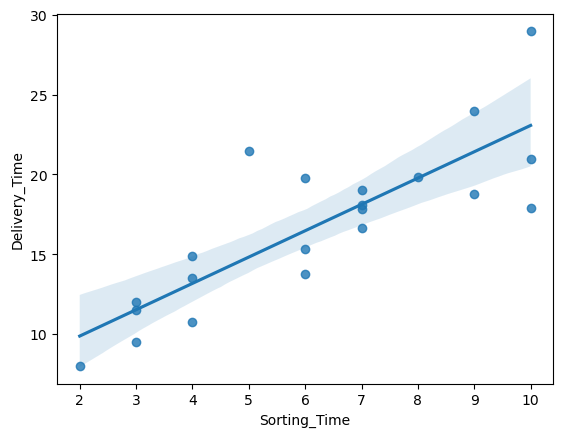

In [13]:
sns.regplot(x=data["Sorting_Time"],y=data["Delivery_Time"])
plt.show()

We can see that there is positve correlation between these two variables

#### Model Building

Import require libraries

In [14]:
import statsmodels.formula.api as smf

smf.ols(): It compares the difference between individual points in your data set and the predicted best fit line to measure the amount of error produced.

In [15]:
model = smf.ols("Delivery_Time~Sorting_Time",data=data).fit()

Finding the specific values for model parameters 

In [16]:
print(model.params)

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64


Finding the t-statistic for a given parameter estimate.

In [17]:
model.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

Finding the p-values for a given parameter estimate.

In [18]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

Finding R squared and adj R squared values

In [19]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Printing usefull summary of model

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        12:44:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Prediction for Delivery Time

In [23]:
df1=pd.Series([1,2,3,4,5,6,7,8,9,10,11,12])
data_pred=pd.DataFrame(df1,columns=["Sorting_Time"])
df1


0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
dtype: int64

In [67]:
model.predict(data_pred)

0      8.231754
1      9.880774
2     11.529794
3     13.178814
4     14.827833
5     16.476853
6     18.125873
7     19.774893
8     21.423913
9     23.072933
10    24.721953
11    26.370973
dtype: float64

As we can see predicted delivery time for given inputs

Lets try using log of columns

In [24]:
model1 = smf.ols("Delivery_Time~np.log(Sorting_Time)",data = data).fit() 

In [25]:
model1.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [61]:
model1.tvalues

Intercept               13.085552
np.log(Sorting_Time)     8.024484
dtype: float64

In [62]:
model1.pvalues

Intercept               5.921137e-11
np.log(Sorting_Time)    1.601539e-07
dtype: float64

In [63]:
model1.rsquared,model1.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        02:00:28   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets try using square of Sorting Time column

In [66]:
model2 = smf.ols("Delivery_Time~np.square(Sorting_Time)",data=data).fit()

In [67]:
model2.params

Intercept                  11.237205
np.square(Sorting_Time)     0.124870
dtype: float64

In [68]:
model.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [69]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [75]:
model2.rsquared,model2.rsquared_adj

(0.6302871815826637, 0.6108286121922777)

In [70]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.74e-05
Time:                        02:03:55   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(Sorting_Time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets try by using square root of Sorting Time column

In [71]:
model3 = smf.ols("Delivery_Time~np.sqrt(Sorting_Time)",data=data).fit()

In [72]:
model3.params

Intercept               -2.518837
np.sqrt(Sorting_Time)    7.936591
dtype: float64

In [73]:
model3.tvalues

Intercept               -0.840911
np.sqrt(Sorting_Time)    6.592434
dtype: float64

In [74]:
model3.pvalues

Intercept                0.410857
np.sqrt(Sorting_Time)    0.000003
dtype: float64

In [76]:
model3.rsquared,model3.rsquared_adj

(0.6958062276308671, 0.6797960290851233)

In [77]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           2.61e-06
Time:                        02:06:59   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2. Build a prediction model for Salary hike

Loading dataset

In [4]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### EDA and Data Visualization

In [6]:
df.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
df.shape

(30, 2)

Boxplot

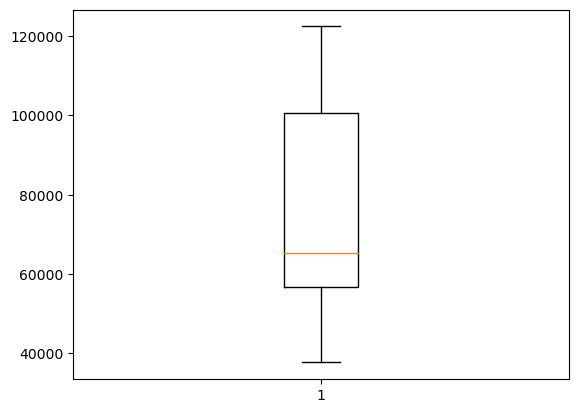

In [14]:
plt.boxplot(df['Salary'])
plt.show()

Distribution Plot

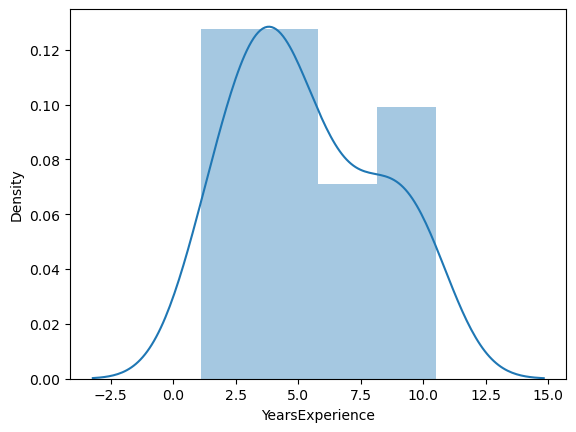

In [16]:
sns.distplot(df["YearsExperience"])
plt.show()

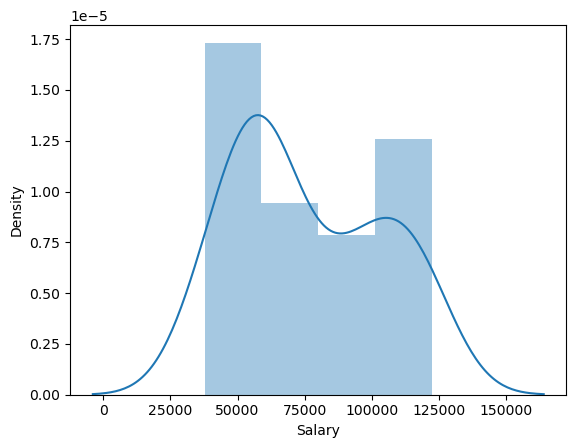

In [17]:
sns.distplot(df["Salary"])
plt.show()

Pairplot

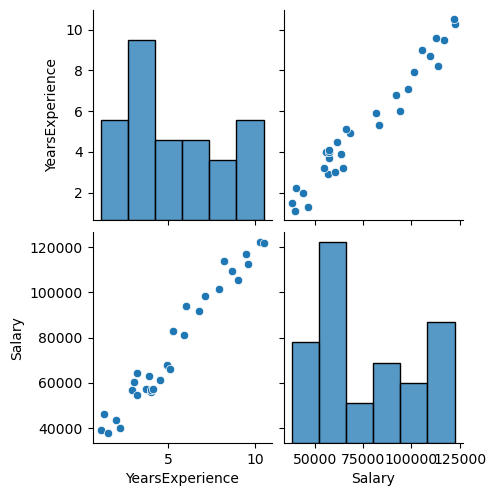

In [18]:
sns.pairplot(df)
plt.show()

Correlation between these two variables

In [19]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


We can say that there is high positive correlation between 'YearsExperience' and 'Salary'

Lets rename the columns

In [20]:
df = df.rename({"YearsExperience":"Experience"},axis=1)
df

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


sns.regplot : Plot data and a linear regression model fit.

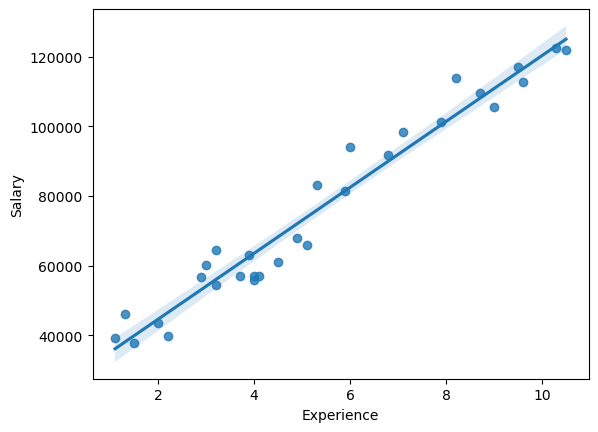

In [22]:
sns.regplot(x=df["Experience"],y=df["Salary"])
plt.show()

#### Model Building

In [25]:
model = smf.ols("Salary~Experience",data=df).fit()

In [26]:
model.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [27]:
model.pvalues

Intercept     5.511950e-12
Experience    1.143068e-20
dtype: float64

In [28]:
model.tvalues

Intercept     11.346940
Experience    24.950094
dtype: float64

In [29]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        14:03:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Prediction for salary hike

In [31]:
df1 = pd.Series([3,8])
data_pred = pd.DataFrame(df1, columns=["Experience"])
df1

0    3
1    8
dtype: int64

In [32]:
model.predict(data_pred)

0     54142.087163
1    101391.898770
dtype: float64

We can see that model has predicted 54142.08 salary for 3 years of experienced person and 101391.89 salary for 8 year of experienced person

#### Build more models

In [33]:
model1 = smf.ols("Salary~np.log(Experience)",data=df).fit()

In [34]:
model1.params

Intercept             14927.97177
np.log(Experience)    40581.98796
dtype: float64

In [35]:
model1.tvalues

Intercept              2.895135
np.log(Experience)    12.791989
dtype: float64

In [36]:
model1.pvalues

Intercept             7.268813e-03
np.log(Experience)    3.250155e-13
dtype: float64

In [37]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           3.25e-13
Time:                        14:08:45   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Experience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model2=smf.ols("Salary~np.square(Experience)",data=df).fit()

In [39]:
model2.params

Intercept                48042.585515
np.square(Experience)      776.318773
dtype: float64

In [40]:
model2.tvalues

Intercept                21.973654
np.square(Experience)    17.397015
dtype: float64

In [41]:
model2.pvalues

Intercept                3.389190e-19
np.square(Experience)    1.518127e-16
dtype: float64

In [42]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.52e-16
Time:                        14:09:26   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(Experience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model3=smf.ols("Salary~np.sqrt(Experience)",data=df).fit()

In [44]:
model3.params

Intercept             -16055.769117
np.sqrt(Experience)    41500.680583
dtype: float64

In [45]:
model3.tvalues

Intercept              -3.262308
np.sqrt(Experience)    19.437148
dtype: float64

In [46]:
model3.pvalues

Intercept              2.906965e-03
np.sqrt(Experience)    8.565358e-18
dtype: float64

In [47]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           8.57e-18
Time:                        14:10:08   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(Experience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""